In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#import cleaned data
data_set = pd.read_csv('clean_data.csv', header=0)

# #import data schema
# data_schema = pd.read_csv('./cleaned_HCMST_2017_schema.csv', header=0, index_col=0)
# data_set

In [33]:
#split data set into in sample and out-of-sample (OOS) data,
#so that a machine learning model can be built, and we can use the model to classify OOS data
oos_size = int(0.10*data_set.shape[0])
ins_size = data_set.shape[0] - oos_size
data = data_set[:ins_size]
oos_data = data_set[ins_size:]

In [34]:
data.describe(include=[np.number])

,Years_Together,First_Together,End_Year,Age_Diff,Age,P_Age
count,2632.000000,2632.000000,112.000000,2631.000000,2632.000000,2631.000000
mean,23.505699,1993.000000,2005.383929,4.229571,50.457827,50.188521
std,16.932018,17.032734,10.709300,4.891186,16.272332,16.285879
min,0.000000,1939.000000,1973.000000,0.000000,18.000000,17.000000
25%,9.000000,1980.000000,1997.750000,1.000000,37.000000,36.000000
50%,21.000000,1996.000000,2009.000000,3.000000,52.000000,51.000000
75%,36.000000,2007.000000,2014.000000,6.000000,63.000000,63.000000
max,78.000000,2017.000000,2017.000000,45.000000,93.000000,95.000000


In [35]:
pd.set_option('display.max_columns', None)
data.describe(include=['O'])

,Married,Religious_Attendance,Interracial_Couple,Education,P_Education,Gender,Household_Income,Ethnicity,P_Ethnicity,Politics,P_Politics,White,Black or African American,American Indian or Alaska Native,Asian Indian,Chinese,Filipino,Japanese,Korean,Vietnamese,Other Asian,Hawaiian,Guamanian,Samoan,Other Pacific Islander,Some other race,school,college,mil,church,vol_org,customer,bar_restaurant,party,internet_other,internet_dating,internet_soc_network,internet_game,internet_chat,internet_org,public,blind_date,vacation,single_serve_nonint,business_trip,work_neighbors,met_online
count,2632,2632,2613,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2632,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2575,2632
unique,2,7,2,4,15,2,21,5,6,7,8,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,"Yes, I am Married",Never,no,Bachelor's degree or higher,HS graduate or GED,Female,"$100,000 to $124,999","White, Non-Hispanic",White,Strong Democrat,Undecided/Independent/Other,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
freq,1856,734,2211,990,611,1318,358,1940,2115,503,754,2217,2387,2535,2610,2586,2611,2613,2619,2622,2615,2618,2625,2625,2623,2571,2293,2364,2515,2416,2426,2414,2055,2324,2499,2436,2543,2567,2548,2570,2484,2481,2539,2552,2570,2541,2348


**We want to investigate the first question:**

1) Where are the top fives places couples met that resulted in relationships that lasted the longest?

In [36]:
#collect venue columns as a single column called places
places = data.columns[list(data.columns).index('school')::]

In [37]:
data[places]

,school,college,mil,church,vol_org,customer,bar_restaurant,party,internet_other,internet_dating,internet_soc_network,internet_game,internet_chat,internet_org,public,blind_date,vacation,single_serve_nonint,business_trip,work_neighbors,met_online
0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,no,no,no,no,no,no,yes,no,yes,no,no,no,no,no,no,no,no,no,no,no,yes
2,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
3,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,yes,no,no,no
4,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no
2628,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no
2629,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no
2630,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no


In [38]:
#convert yes or no answers to 0 and 1, combine these results as the new column 'met_places'
p_cols = data[places].copy()
p_cols = p_cols.replace({'yes': 1, 'no': 0})
#use idxmax to identify 'yes' i.e. 1
p_cols = p_cols.idxmax(axis=1)
data['places_met'] = p_cols

c:\users\grant\documents\learningstuff\datascienceprojects\date_marriage_hcmst_2017\venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
data = data[data['Age_Diff'].notna()]

In [61]:
#group Yeaers_Togther by places_met, sort values
data.groupby('places_met').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)

,count,min,median,max,mean
places_met,,,,,
school,1032,0.0,24.0,69.0,25.986434
bar_restaurant,434,0.0,17.0,67.0,20.405530
college,206,0.0,23.5,78.0,26.684466
party,163,0.0,21.0,71.0,22.484663
church,139,0.0,19.0,63.0,23.323741
customer,134,0.0,21.5,59.0,23.067164
public,76,0.0,20.0,68.0,24.657895
internet_dating,67,0.0,4.0,32.0,5.940299
vol_org,65,0.0,19.0,65.0,24.907692


### Results: 

- Adjusting for the number of responses, it appears that the top five places/situations in which couples with long lasting relationships met are:

    1. In school
    2. At a bar or restaurant
    3. In college
    4. At a party
    5. At church
    
    
- Among other categories with a siginificant number of responses (~50), couples met via internet settings have the most short-lived relationships on average.

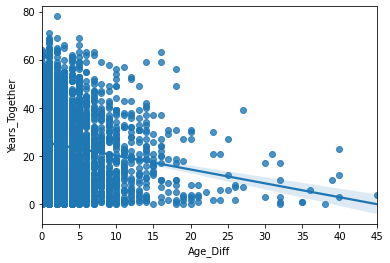

In [62]:
sns.regplot(y=data['Years_Together'], x=data['Age_Diff'])
plt.show()

In [64]:
from sklearn.linear_model import ElasticNet
X = data['Age_Diff'].to_numpy().reshape(-1,1)
y = data['Years_Together'].to_numpy().reshape(-1,1)
# data['Age_Diff'].unique()
reg = ElasticNet().fit(X, y)
reg.score(X,y)

0.02745104013711086

In [76]:
data.groupby('Age_Diff').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)

,count,min,median,max,mean
Age_Diff,,,,,
1.0,532,0.0,22.0,71.0,25.808271
2.0,403,0.0,24.0,78.0,25.295285
0.0,326,0.0,22.5,64.0,25.374233
3.0,284,0.0,23.5,66.0,24.806338
4.0,225,0.0,19.0,62.0,21.951111
5.0,182,0.0,23.5,69.0,24.939560
6.0,137,0.0,19.0,63.0,21.489051
7.0,104,0.0,20.0,63.0,21.942308
9.0,74,0.0,13.0,58.0,17.743243


In [77]:
data.groupby('Religious_Attendance').Years_Together.agg([
    'count','min','median','max','mean']).sort_values(by=['count', 'mean'], ascending=False)

,count,min,median,max,mean
Religious_Attendance,,,,,
Never,734,0.0,16.0,69.0,20.444142
Once a week,513,0.0,26.0,78.0,27.684211
Once a year or less,509,0.0,18.0,65.0,21.866405
A few times a year,429,0.0,21.0,68.0,23.505828
Once or twice a month,225,0.0,18.0,69.0,22.066667
More than once a week,216,1.0,29.0,68.0,29.444444
Refused,5,3.0,25.0,46.0,23.600000


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

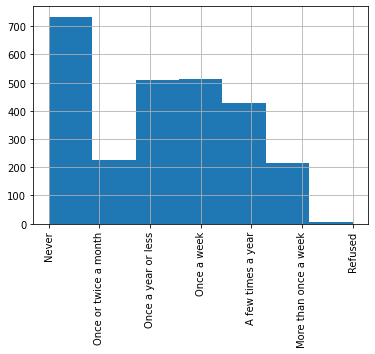

In [30]:
data.Religious_Attendance.hist(bins=7)
plt.xticks(rotation='vertical')